In [1]:
import pandas as pd

articulos_file = "../datalake/Articulos.csv"  
clientes_file = "../datalake/Clientes.csv"  
factura_file = "../datalake/Factura.csv"  
factura_detalle_file = "../datalake/FacturaDetalle.csv"  
unidad_medida_file = "../datalake/UnidadMedida.csv"  

articulos_df = pd.read_csv(articulos_file)
clientes_df = pd.read_csv(clientes_file)
factura_df = pd.read_csv(factura_file)
factura_detalle_df = pd.read_csv(factura_detalle_file)
unidad_medida_df = pd.read_csv(unidad_medida_file)

In [5]:
# Filtrar filas donde la columna "Cantidad" sea mayor que 5
df_filtrado = factura_detalle_df[factura_detalle_df['Cantidad'] > 5]
print(df_filtrado)

        IdFacturaDetalle  NroDoc  Codigo  \
0                      1       1      38   
2                      3       2      38   
3                      4       2      93   
9                     10       3      16   
10                    11       3      14   
...                  ...     ...     ...   
154096            180933   30584     282   
154097            180934   30584      45   
154098            180935   30585      37   
154103            180953   30586     279   
154104            180954   30586     296   

                                      Descripcion  Bulto   UM  Cantidad  \
0       LECHE DESCREMADA LARGA VIDA ILOLAY X 1 LT   12.0  Uni     12.00   
2       LECHE DESCREMADA LARGA VIDA ILOLAY X 1 LT    6.0  Uni      6.00   
3                                 CALDO X 6 WILDE   12.0  Uni     12.00   
9                         YOGUR CON CEREAL ILOLAY    6.0  Uni      6.00   
10                   YOGUR FIRME ILOLAY X 190 GRS    0.0  Uni      6.00   
...                  

In [6]:
# Filtrar filas donde la columna "Tipo" sea igual a "FAC"
df_filtrado2 = factura_detalle_df[factura_detalle_df['Descripcion'] == 'LECHE DESCREMADA LARGA VIDA ILOLAY X 1 LT']
print(df_filtrado2)

    IdFacturaDetalle  NroDoc  Codigo  \
0                  1       1      38   
2                  3       2      38   
34                35       8      38   

                                  Descripcion  Bulto   UM  Cantidad   PU  \
0   LECHE DESCREMADA LARGA VIDA ILOLAY X 1 LT   12.0  Uni      12.0  4.3   
2   LECHE DESCREMADA LARGA VIDA ILOLAY X 1 LT    6.0  Uni       6.0  4.3   
34  LECHE DESCREMADA LARGA VIDA ILOLAY X 1 LT    0.0  Uni       4.0  4.3   

    Bonif  Importe  
0     0.0     51.6  
2     0.0     25.8  
34    0.0     17.2  


In [7]:
# Calcular la suma de la columna "Importe" agrupada por "NroDoc"
resumen = factura_detalle_df.groupby('NroDoc')['Importe'].sum()
print(resumen)

NroDoc
1          104.04
2          225.12
3          162.60
4          119.05
5           72.47
           ...   
30582     6652.00
30583    15445.00
30584     4998.00
30585    21466.30
30586    39481.15
Name: Importe, Length: 30571, dtype: float64


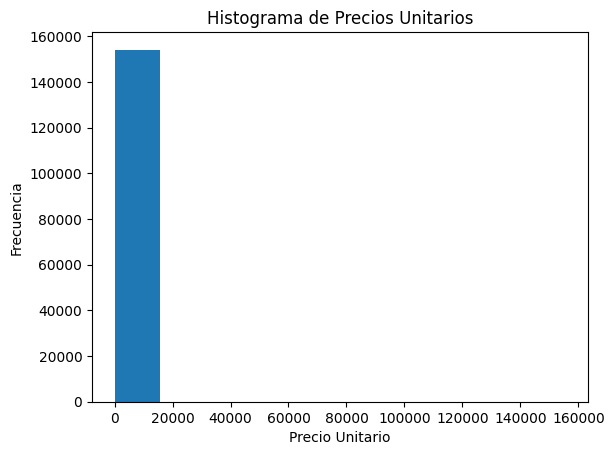

In [8]:
import matplotlib.pyplot as plt

# Crear un histograma de la columna "PU"
factura_detalle_df['PU'].plot.hist()
plt.xlabel('Precio Unitario')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios Unitarios')
plt.show()

In [9]:
# Calcular el total de Importe por Tipo de Artículo
resumen = factura_detalle_df.groupby('Descripcion')['Importe'].sum()
print(resumen)

Descripcion
ACEITUNA DESCAROZADA X 200 GRS     63773.78
ACEITUNA RELLENAS                   7270.05
ACEITUNA X 100 GRS                 38576.60
ACEITUNA X 200                     12818.26
ACEITUNA X 8 KG                     5393.80
                                    ...    
YOGUR ILOLAY X 1 KG EN SACHET     620779.28
YOGUR SACHET 1L CREMIGAL          353157.10
YOGUR X 1 Kg DESCREMADO             5227.61
YOGUR X 120 G CREMIGAL            136976.75
YOGUR X 160 Grs C/ FRUTAS           1204.62
Name: Importe, Length: 367, dtype: float64


In [10]:
# Filtrar filas donde el Tipo de Artículo sea "LECHE DESCREMADA LARGA VIDA ILOLAY X 1 LT"
leche_df = factura_detalle_df[factura_detalle_df['Descripcion'] == 'LECHE DESCREMADA LARGA VIDA ILOLAY X 1 LT']
print(leche_df)

    IdFacturaDetalle  NroDoc  Codigo  \
0                  1       1      38   
2                  3       2      38   
34                35       8      38   

                                  Descripcion  Bulto   UM  Cantidad   PU  \
0   LECHE DESCREMADA LARGA VIDA ILOLAY X 1 LT   12.0  Uni      12.0  4.3   
2   LECHE DESCREMADA LARGA VIDA ILOLAY X 1 LT    6.0  Uni       6.0  4.3   
34  LECHE DESCREMADA LARGA VIDA ILOLAY X 1 LT    0.0  Uni       4.0  4.3   

    Bonif  Importe  
0     0.0     51.6  
2     0.0     25.8  
34    0.0     17.2  


In [11]:
# Calcular la correlación entre "Cantidad" y "Importe"
correlacion = factura_detalle_df['Cantidad'].corr(factura_detalle_df['Importe'])
print(correlacion)

0.15590490954453404


In [12]:
# Calcular el KPI de margen de beneficio (Profit Margin)
factura_detalle_df['Profit Margin'] = (factura_detalle_df['Importe'] - factura_detalle_df['Importe']) / factura_detalle_df['Importe']
print(factura_detalle_df['Profit Margin'])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
154110    0.0
154111    0.0
154112    0.0
154113    0.0
154114    0.0
Name: Profit Margin, Length: 154115, dtype: float64


In [13]:
# Gráfico de línea para visualizar las ventas a lo largo del tiempo
factura_detalle_df.dropna(subset=['FechaFactura'], inplace=True)
factura_detalle_df['FechaFactura'] = pd.to_datetime(factura_detalle_df['FechaFactura'])
factura_detalle_df.set_index('FechaFactura', inplace=True)
factura_detalle_df.resample('M')['Importe'].sum().plot()


KeyError: ['FechaFactura']

In [14]:
# Identificar y manejar valores atípicos en la columna "Importe"
import numpy as np
z_scores = (factura_detalle_df['Importe'] - factura_detalle_df['Importe'].mean()) / factura_detalle_df['Importe'].std()
factura_detalle_df['Outlier'] = np.abs(z_scores) > 3

print(factura_detalle_df['Outlier'])

0         False
1         False
2         False
3         False
4         False
          ...  
154110    False
154111    False
154112    False
154113    False
154114    False
Name: Outlier, Length: 154115, dtype: bool


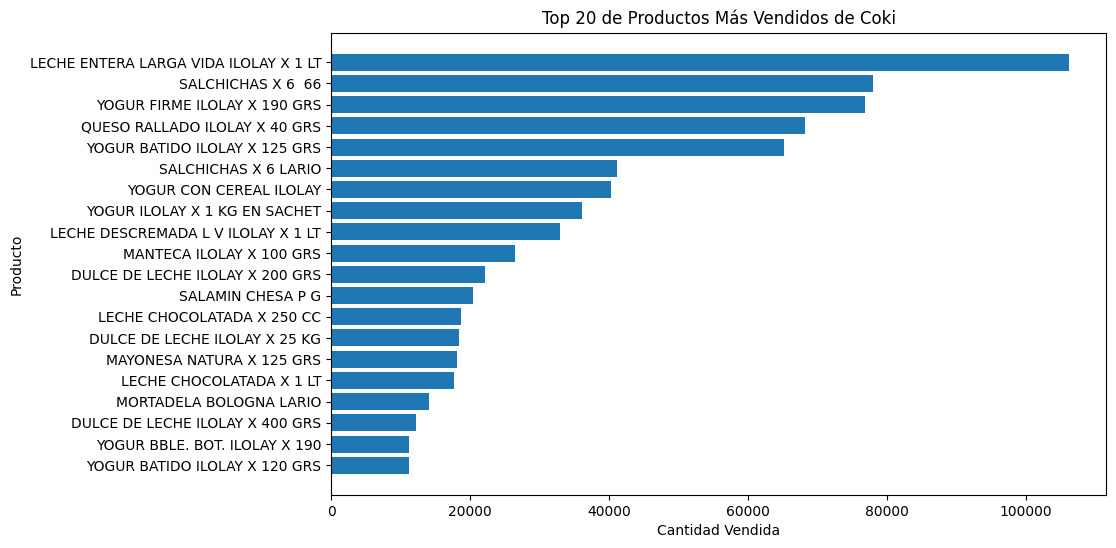

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por producto y sumar las cantidades vendidas
ventas_por_producto = factura_detalle_df.groupby('Descripcion')['Cantidad'].sum().reset_index()

# Ordenar por cantidad vendida en orden descendente
productos_mas_vendidos = ventas_por_producto.sort_values(by='Cantidad', ascending=False)

# print(ventas_por_producto)
# print(productos_mas_vendidos)
 
# Tomar los 10 productos más vendidos (por ejemplo)
top_10_mas_vendidos = productos_mas_vendidos.head(20)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(top_10_mas_vendidos['Descripcion'], top_10_mas_vendidos['Cantidad'])
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.title('Top 20 de Productos Más Vendidos de Coki')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el producto más vendido en la parte superior
plt.show()



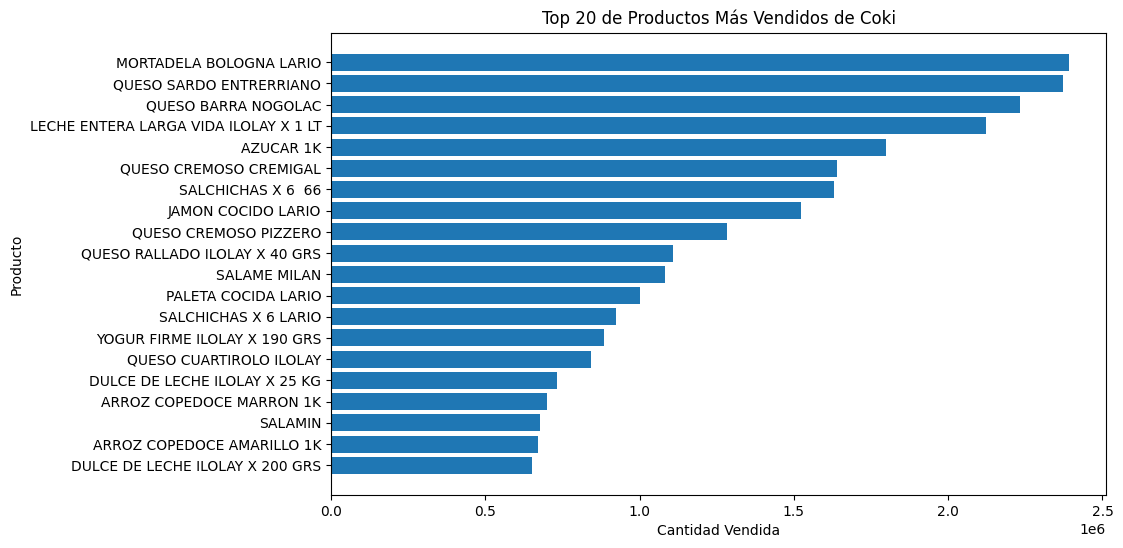

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por producto y sumar los importes vendidas
ventas_por_producto = factura_detalle_df.groupby('Descripcion')['Importe'].sum().reset_index()

# Ordenar por importe vendido en orden descendente
productos_mas_vendidos = ventas_por_producto.sort_values(by='Importe', ascending=False)

# print(ventas_por_producto)
# print(productos_mas_vendidos)
 
# Tomar los 10 productos más vendidos (por ejemplo)
top_10_mas_vendidos = productos_mas_vendidos.head(20)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(top_10_mas_vendidos['Descripcion'], top_10_mas_vendidos['Importe'])
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.title('Top 20 de Productos Más Vendidos de Coki')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el producto más vendido en la parte superior
plt.show()


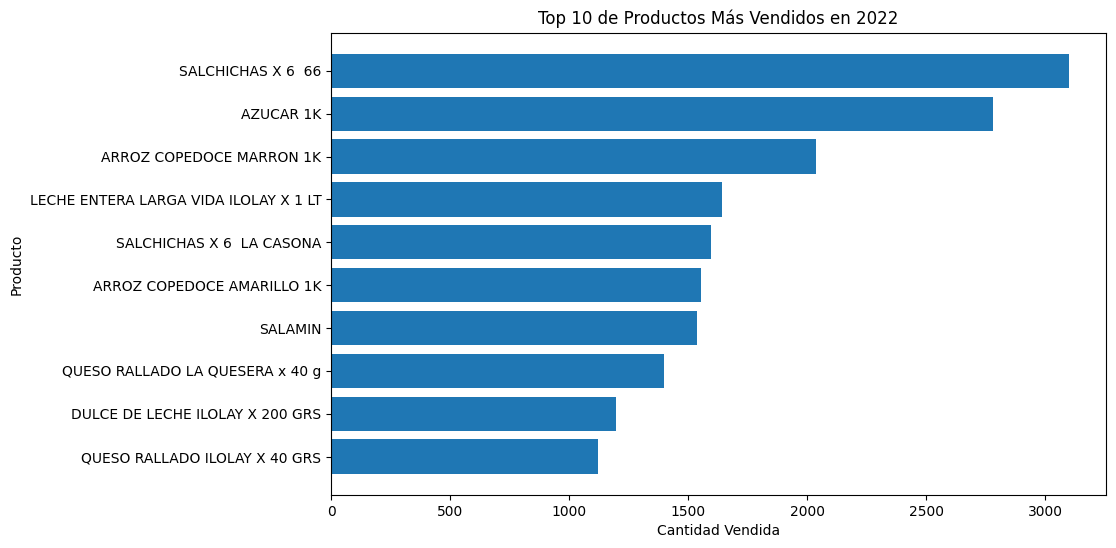

In [29]:
import matplotlib.pyplot as plt

# Convertir la columna 'FechaFactura' a objeto datetime
factura_df['FechaFactura'] = pd.to_datetime(factura_df['FechaFactura'])

# Filtrar las facturas del año 2022
facturas_2022 = factura_df[factura_df['FechaFactura'].dt.year == 2022]

# Unir los DataFrames de facturas y detalles de factura
facturas_2022_detalles = pd.merge(facturas_2022, factura_detalle_df, left_on='IdFactura', right_on='NroDoc') 

productos_mas_vendidos_2022 = facturas_2022_detalles.groupby('Descripcion')['Cantidad'].sum().reset_index()

# Ordenar por cantidad vendida en orden descendente
productos_mas_vendidos_2022 = productos_mas_vendidos_2022.sort_values(by='Cantidad', ascending=False)

# Tomar los 10 productos más vendidos (por ejemplo)
top_10_mas_vendidos_2022 = productos_mas_vendidos_2022.head(10)
 
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_10_mas_vendidos_2022['Descripcion'], top_10_mas_vendidos_2022['Cantidad'])
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.title('Top 10 de Productos Más Vendidos en 2022')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el producto más vendido en la parte superior
plt.show()

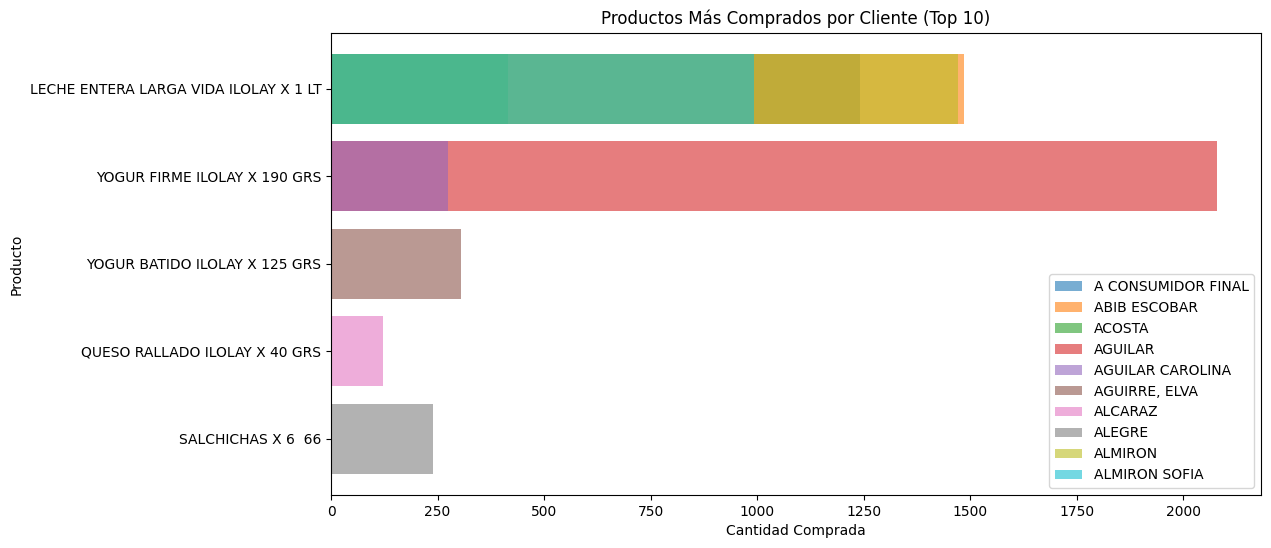

In [38]:
import pandas as pd
import matplotlib.pyplot as plt 

# Convertir la columna 'FechaFactura' a objeto datetime
factura_df['FechaFactura'] = pd.to_datetime(factura_df['FechaFactura'])

# Unir los DataFrames de facturas y detalles de factura
facturas_detalles_clientes = pd.merge(factura_df, factura_detalle_df, left_on='IdFactura', right_on='NroDoc')

# Unir los DataFrames combinados con el DataFrame de clientes
facturas_detalles_clientes = pd.merge(facturas_detalles_clientes, clientes_df, left_on='IdCliente', right_on='Cod_Cliente')

# Calcular los productos más comprados por cliente usando la columna "Razon_Social"
productos_mas_comprados_por_cliente = facturas_detalles_clientes.groupby(['Razon_Social', 'Descripcion'])['Cantidad'].sum().reset_index()

# Para encontrar el producto más comprado por cada cliente
productos_mas_comprados_por_cliente = productos_mas_comprados_por_cliente.sort_values(by=['Razon_Social', 'Cantidad'], ascending=[True, False])
productos_mas_comprados_por_cliente = productos_mas_comprados_por_cliente.drop_duplicates(subset='Razon_Social', keep='first')

# Crear un DataFrame que contenga solo los 10 primeros productos más comprados por cliente
top_10_productos_por_cliente = productos_mas_comprados_por_cliente.head(10)

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
for i, cliente_nombre in enumerate(top_10_productos_por_cliente['Razon_Social']):
    productos_cliente = top_10_productos_por_cliente[top_10_productos_por_cliente['Razon_Social'] == cliente_nombre]
    plt.barh(productos_cliente['Descripcion'], productos_cliente['Cantidad'], label=f'{cliente_nombre}', alpha=0.6)

plt.xlabel('Cantidad Comprada')
plt.ylabel('Producto')
plt.title('Productos Más Comprados por Cliente (Top 10)')
plt.legend()
plt.gca().invert_yaxis()
plt.show()
